# Mining YouTube Data

<br>
This repo contains the Mining YouTube Data using Python project as part of my data science portfolio. There are two parts in this project:
1. [About YouTube](#about-youtube)
2. [Mining YouTube Data](#mining-youtube)
  - [By Keywords](#keywords)
  - [By Channels](#channels)
  - [Extracting Video Comments](#comments)

The first part - About YouTube is an introduction of YouTube, its history and some interesting statistics. The second part - Mining YouTube Data using Python contains the Python code to work with YouTube Data API in order to extract data and perform various analysis on YouTube videos.

***
# <a name="about-youtube">About YouTube</a>
YouTube is a video sharing website headquartered in San Bruno, California. It was founded by three former PayPal employees — Chad Hurley, Steve Chen, and Jawed Karim in February 2005. The very first YouTube video was uploaded on 23 April 2005. Google bought the site in November 2006 for US$1.65 billion; YouTube now operates as one of Google's subsidiaries.


Some interesting [statistics](https://www.youtube.com/yt/about/press/) about Youtube:
- Over 1.9 Billion logged-in users visit YouTube each month
- Over a billion hours of video viewed on YouTube every day, generating billions of views
- More than 70% of YouTube watchtime comes from mobile devices
- YouTube has launched local versions in more than 91 countries
- You can navigate YouTube in a total of 80 different languages (covering 95% of the Internet population)

***
# <a name="mining-youtube">Mining YouTube Data</a>


With a huge collection of videos attracting billions of views from users each month, the resulting data generated by YouTube is enormous. Data like view count, like count, dislike count, user comments, etc are all valuable data that can be extracted and analyzed to uncover insights about user preferences and sentiment towards a particular video or a particular cause e.g. the Ice Bucket Challenge, sometimes called the ALS Ice Bucket Challenge that went viral on YouTube few years ago. It also presents valuable information to marketers in their decision-making process of promoting a particular product or service. A fun example would be a movie studio, having uploaded a new movie trailer on their YouTube channel and would like to know about viewers' response towards the upcoming movie. Statistics on the movie trailer such as view count, like count and user comments can help marketers to gauge the market response to the movie and allocate their marketing budget accordingly. This is the primary motivation behind this project. In this project, I have extracted and analyzed some interesting statistics about popular superhero movies from both Disney/Marvel and Warner Bros/DC such as Infinity War, Justice League, Black Panther, Wonder Woman and Aquaman.

In this project, I have used [YouTube Data API v3](https://developers.google.com/youtube/v3) to extract data about videos and retrieve their statistics such as number of views, likes, dislikes, comments, etc. Then I converted these statistics into pandas DataFrame for further analysis. Analysis performed included ranking the most popular videos by view count and like count, and analyzing view count by day of the week. In the last part of this project, I have also extracted the comments from a YouTube video and performed wordcloud visualization on the most popular words, and followed by sentiment analysis using [NLTK](https://www.nltk.org/). The Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing for English written in the Python programming language.


Note: To use the YouTube Data API, you will need a API key which you can obtain in the [Google APIs Console](https://console.developers.google.com). You will need to create a new project, and enable the YouTube Data API for the project. To simplify things, I have used Google API python client which is a python client to interact with the Google APIs in an easier way. In order to use the API, you have to build a resource object for that API. Alternatively, you can also manually call the YouTube Data API to retrieve the data, by setting the query parameters in the API endpoint to perform search on query term that you are interested.


If you are using Jupyter Notebook on Anaconda, you will need to install [Google API Client Library for Python](https://anaconda.org/conda-forge/google-api-python-client) by running the following command in your Anaconda Prompt: 

`conda install -c conda-forge google-api-python-client`


***
# <a name="keywords">By Keywords</a>

## Import libraries ##

In [1]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from apiclient.discovery import build 
import requests

### API Endpoint


Set YouTube Search parameters: There are some parameters that you need to set:
- set SERVICE_NAME as "youtube" and the VERSION as "v3
- set DEVELOPER_KEY to the API key that you obtain from  Google APIs Console. You will need to create a new project, and enable the YouTube Data API for the project
- set QUERY parameter for the query term that you are interested, in this example we will search for "infinity war"
- set PART parameter to id,snippet (it specifies a comma-separated list of one or more search resource properties that the API response will include)
- set MAXRESULTS parameter as 50 as limited by Google (it specifies the maximum number of items that should be returned in the result set)
- set PAGETOKEN if you are extracting the next page videos
- the default ORDER is by relevance, but it can be changed to "date, viewCount", "rating", "title", "videoCount"

In [2]:
# set parameters
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"
DEVELOPER_KEY = "YOUR_API_KEY_HERE" 
QUERY = "infinity+war"
PART = "id,snippet"
MAXRESULTS = "50"
PAGETOKEN = ""
ORDER = "relevance" # default=relevance, can be "viewCount", "rating", "title", "videoCount"

url = "https://www.googleapis.com/{0}/{1}/search?&key={2}&q={3}&part={4}&maxResults={5}&pageToken={6}&order={7}".format(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION, DEVELOPER_KEY, QUERY, PART, MAXRESULTS, PAGETOKEN, ORDER)

search_response = requests.get(url).json()

search_response

{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/NUwA08d3AtssiiKvIDFG_bzAjng"',
 'items': [{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/XVZFnQWsQsmTkmCa-EK1Ur7-7kE"',
   'id': {'kind': 'youtube#video', 'videoId': '-y_Kjj3Hdb4'},
   'kind': 'youtube#searchResult',
   'snippet': {'channelId': 'UCGZHqViKUoSfgPOD_d6vUig',
    'channelTitle': 'MV Studio',
    'description': 'Avengers Infinity War - All Best Scenes In Movie [HD Bluray] #avengers #infinitywar #thanos FOLLOW US ON: ▻ Youtube: ...',
    'liveBroadcastContent': 'none',
    'publishedAt': '2018-12-06T16:13:33.000Z',
    'thumbnails': {'default': {'height': 90,
      'url': 'https://i.ytimg.com/vi/-y_Kjj3Hdb4/default.jpg',
      'width': 120},
     'high': {'height': 360,
      'url': 'https://i.ytimg.com/vi/-y_Kjj3Hdb4/hqdefault.jpg',
      'width': 480},
     'medium': {'height': 180,
      'url': 'https://i.ytimg.com/vi/-y_Kjj3Hdb4/mqdefault.jpg',
      'width': 320}},
    'title': 'Avengers Infinity War - All Best Scenes In Movie [HD Bluray]'

### Google API Python Client
Another simpler method is to use Google API Python Client or `apiclient` which is a python client to interact with the Google APIs in an easier way. In order to use the API, we need to build a resource object for the API. We passed the service name, its version and our Developer(or API) key to build method of apiclient.discovery module.

In [3]:
# arguments to be passed to build function
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"
DEVELOPER_KEY = "YOUR_API_KEY_HERE"

# create youtube resource object for interacting with API
youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION,
                    developerKey=DEVELOPER_KEY)

We will use search.list function and pass in the query parameters. YouTube API will return a collection of search results that match the query parameters specified in the API request. By default, a search result set identifies matching video, channel, and playlist resources, but you can also configure queries to only retrieve a specific type of resource. More info at https://developers.google.com/youtube/v3/docs/search/list

In [4]:
# query parameters
query = "infinity war"
part = "id,snippet"
maxresults = "50"
order = "relevance" # default=relevance, can be "viewCount", "rating", "title", "videoCount"
channelid = ""
pagetoken = ""

# calling the search.list method to retrieve youtube search results
search_response = youtube.search().list(q = query, 
                                            part = part,
                                            maxResults = maxresults,).execute()

In [5]:
# take a look at the JSON object returned by YouTube, it should be the same as calling the endpoint manually
search_response

{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Ekt17xC6IrB3CGt1u4oZfW3a2dc"',
 'items': [{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/XVZFnQWsQsmTkmCa-EK1Ur7-7kE"',
   'id': {'kind': 'youtube#video', 'videoId': '-y_Kjj3Hdb4'},
   'kind': 'youtube#searchResult',
   'snippet': {'channelId': 'UCGZHqViKUoSfgPOD_d6vUig',
    'channelTitle': 'MV Studio',
    'description': 'Avengers Infinity War - All Best Scenes In Movie [HD Bluray] #avengers #infinitywar #thanos FOLLOW US ON: ▻ Youtube: ...',
    'liveBroadcastContent': 'none',
    'publishedAt': '2018-12-06T16:13:33.000Z',
    'thumbnails': {'default': {'height': 90,
      'url': 'https://i.ytimg.com/vi/-y_Kjj3Hdb4/default.jpg',
      'width': 120},
     'high': {'height': 360,
      'url': 'https://i.ytimg.com/vi/-y_Kjj3Hdb4/hqdefault.jpg',
      'width': 480},
     'medium': {'height': 180,
      'url': 'https://i.ytimg.com/vi/-y_Kjj3Hdb4/mqdefault.jpg',
      'width': 320}},
    'title': 'Avengers Infinity War - All Best Scenes In Movie [HD Bluray]'

In [6]:
# extract the results from search response
results = search_response.get("items", [])

results

[{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/XVZFnQWsQsmTkmCa-EK1Ur7-7kE"',
  'id': {'kind': 'youtube#video', 'videoId': '-y_Kjj3Hdb4'},
  'kind': 'youtube#searchResult',
  'snippet': {'channelId': 'UCGZHqViKUoSfgPOD_d6vUig',
   'channelTitle': 'MV Studio',
   'description': 'Avengers Infinity War - All Best Scenes In Movie [HD Bluray] #avengers #infinitywar #thanos FOLLOW US ON: ▻ Youtube: ...',
   'liveBroadcastContent': 'none',
   'publishedAt': '2018-12-06T16:13:33.000Z',
   'thumbnails': {'default': {'height': 90,
     'url': 'https://i.ytimg.com/vi/-y_Kjj3Hdb4/default.jpg',
     'width': 120},
    'high': {'height': 360,
     'url': 'https://i.ytimg.com/vi/-y_Kjj3Hdb4/hqdefault.jpg',
     'width': 480},
    'medium': {'height': 180,
     'url': 'https://i.ytimg.com/vi/-y_Kjj3Hdb4/mqdefault.jpg',
     'width': 320}},
   'title': 'Avengers Infinity War - All Best Scenes In Movie [HD Bluray]'}},
 {'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/z52V2rZTbIFNKHJQqX7XYZ9VfEU"',
  'id': {'kind': 'yout

In [7]:
# create 3 separate empty lists to store video, playlist and channel metadata
videos = []
playlists = []
channels = []

# extract the required info from each result object
for result in results:
    # video result object
    if result['id']['kind'] == "youtube#video":
        video = {}
        video['id'] = result["id"]["videoId"]
        video['title'] = result['snippet']['title']
        video['descr'] = result['snippet']['description']
        video['thumbnail'] = result['snippet']['thumbnails']['default']['url']
        videos.append(video)
    # playlist result object
    elif result['id']['kind'] == "youtube#playlist":
        playlist = {}
        playlist['id'] = result['id']['playlistId']
        playlist['title'] = result['snippet']['title']
        playlist['descr'] = result['snippet']['description']
        playlist['thumbnail'] = result['snippet']['thumbnails']['default']['url']
        playlists.append(playlist)
    # channel result object
    elif result['id']['kind'] == "youtube#channel":
        channel = {}
        channel['id'] = result['id']['channelId']
        channel['title'] = result['snippet']['title']
        channel['descr'] = result['snippet']['description']
        channel['thumbnail'] = result['snippet']['thumbnails']['default']['url']
        channels.append(channel)

In [8]:
# take a look at the videos list 
print("There are {} videos in the result".format(len(videos)))
videos

There are 50 videos in the result


[{'descr': 'Avengers Infinity War - All Best Scenes In Movie [HD Bluray] #avengers #infinitywar #thanos FOLLOW US ON: ▻ Youtube: ...',
  'id': '-y_Kjj3Hdb4',
  'thumbnail': 'https://i.ytimg.com/vi/-y_Kjj3Hdb4/default.jpg',
  'title': 'Avengers Infinity War - All Best Scenes In Movie [HD Bluray]'},
 {'descr': 'A montage of best scenes, moments and lines from Avengers 3.',
  'id': 'sD7QdpNS-g8',
  'thumbnail': 'https://i.ytimg.com/vi/sD7QdpNS-g8/default.jpg',
  'title': 'Avengers Infinity War - Best Scenes HD'},
 {'descr': 'Here are some of the best Fight Scenes from Avengers INFINITY WAR! Let us know what your favorite fight scene from the movie was BELOW!! To Enter the ...',
  'id': 'eWptmkjJ4Xw',
  'thumbnail': 'https://i.ytimg.com/vi/eWptmkjJ4Xw/default.jpg',
  'title': 'Avengers Infinity War  FIGHT SCENES!!!!'},
 {'descr': '"There was an idea…" Avengers: Infinity War. In theaters April 27. ▻ Subscribe to Marvel: http://bit.ly/WeO3YJ Follow Marvel on Twitter:   https://twitter.com/ma

The format of a single sample video will look like the result below, with the description, video id, thumbnail URL and title of the video

In [9]:
# take a look at the format of a single video
videos[0]

{'descr': 'Avengers Infinity War - All Best Scenes In Movie [HD Bluray] #avengers #infinitywar #thanos FOLLOW US ON: ▻ Youtube: ...',
 'id': '-y_Kjj3Hdb4',
 'thumbnail': 'https://i.ytimg.com/vi/-y_Kjj3Hdb4/default.jpg',
 'title': 'Avengers Infinity War - All Best Scenes In Movie [HD Bluray]'}

In [10]:
# take a look at the playlist list 
print("There are {} playlists in the result".format(len(playlists)))
playlists

There are 0 playlists in the result


[]

In [11]:
# take a look at the channel list 
print("There are {} channel in the result".format(len(channels)))
channels

There are 0 channel in the result


[]

**Note: ** There are 50 videos returned as results which contain the video id, thumbnail, title and description. For a quicker result and easy viewing, we can also extract the data into a dictionary format with video ID and title

In [12]:
# extract the video id and title into a dictionary
search_videos = {}

for search_result in search_response.get("items", []):
    if search_result["id"]["kind"] == "youtube#video":
        search_videos[search_result["id"]["videoId"]] = search_result["snippet"]["title"]
        
# take a look at the video ids and title
search_videos

{'-DvfylaSyTg': 'Avengers Infinity War Spider-Man Black Suit Deleted Scene Explained',
 '-M6HnyBp5Vo': 'Everything GREAT About Avengers: Infinity War! (Part 1)',
 '-gm8tvwl4bI': 'Avengers Infinity War - New York Battle Scene | Black Order vs Avengers [HD] 2018 Movie Clip',
 '-y_Kjj3Hdb4': 'Avengers Infinity War - All Best Scenes In Movie [HD Bluray]',
 '6ZfuNTqbHE8': "Marvel Studios' Avengers: Infinity War Official Trailer",
 '7bhDP_OWC9I': "Doctor Strange's EndGame PLAN REVEALED! Avengers Infinity War & Avengers 4 Theory EXPLAINED!",
 '9daF0ka5j2w': '3 NEW Avengers Infinity War CLIPS + Blu-ray Trailer',
 'AL44t2EMMHc': 'Director Reveals Why Hulk Refused To Show Up In Infinity War',
 'Ad7Spt_7eRQ': 'Avengers Infinity War Characters In Real Life [HOTEST]',
 'C0HzmQ9z0QA': 'Thor Saves Wakanda Battle Cut Scenes Infinity War Full HD',
 'DkjMNpa2TOc': 'Avengers Infinity War - IS THANOS DYING? (Stormbreaker Wound Explained!)',
 'DqPImgFyH8Q': 'The Other Ending Of Avengers Infinity War - THAN

### Wrap the code into a Function
To prevent repeating the same code again and again for different queries, we can wrap the code into a function that take in parameters such as query keyword and maximum number of items returned, and then return the list of videos as result

In [13]:
def youtube_search(query, max_results = 50):
    
    # calling the search.list method to retrieve youtube search results
    search_response = youtube.search().list(q = query,
                                            part = "id,snippet",
                                            maxResults = max_results,
                                            order = "relevance").execute()
    
    # extracting the results from search response
    results = search_response.get("items", [])
    
    # create 3 separate empty lists to store video, channel, playlist metadata
    videos = []
    playlists = []
    channels = []

    # extracting required info from each result object
    for result in results:
        # video result object
        if result['id']['kind'] == "youtube#video":
            video = {}
            video['id'] = result["id"]["videoId"]
            video['title'] = result['snippet']['title']
            video['descr'] = result['snippet']['description']
            video['thumbnail'] = result['snippet']['thumbnails']['default']['url']
            videos.append(video)
        # playlist result object
        elif result['id']['kind'] == "youtube#playlist":
            playlist = {}
            playlist['id'] = result['id']['playlistId']
            playlist['title'] = result['snippet']['title']
            playlist['descr'] = result['snippet']['description']
            playlist['thumbnail'] = result['snippet']['thumbnails']['default']['url']
            playlists.append(playlist)
        # channel result object
        elif result['id']['kind'] == "youtube#channel":
            channel = {}
            channel['id'] = result['id']['channelId']
            channel['title'] = result['snippet']['title']
            channel['descr'] = result['snippet']['description']
            channel['thumbnail'] = result['snippet']['thumbnails']['default']['url']
            channels.append(channel)
            
    return videos, playlists, channels

### Test the Function
We can test the function by making a query for "justice league" with 50 as maximum results.

In [14]:
# test the function
test_result = youtube_search("justice league", max_results = 50)
test_result

([{'descr': 'ReleaseTheSnyderCut Justice League (2017) Justice League vs Steppenwolf [Part 1] Justice League playlist: https://goo.gl/FCfR1C Film discription: Fueled by ...',
   'id': 'IAGz2bDlwqA',
   'thumbnail': 'https://i.ytimg.com/vi/IAGz2bDlwqA/default.jpg',
   'title': 'The Final Battle [Part 1] | Justice League'},
  {'descr': 'Batman (Bruce Wayne) Meets Aquaman (Arthur Curry) - Batman Recruits Aquaman - Justice League (2017) Movie CLIP HD [1080p] Bruce Wayne: Arthur Curry.',
   'id': 'WK3-6Wh7UW0',
   'thumbnail': 'https://i.ytimg.com/vi/WK3-6Wh7UW0/default.jpg',
   'title': 'Batman Meets Aquaman Scene - Justice League (2017) Movie CLIP HD'},
  {'descr': 'Yikes. Go to https://NordVPN.com/cinemasins and and use code CINEMASINS to get 75% off a 3 year plan and an extra month for free. Protect yourself online ...',
   'id': 'Hw4kbo2K6lw',
   'thumbnail': 'https://i.ytimg.com/vi/Hw4kbo2K6lw/default.jpg',
   'title': 'Everything Wrong With Justice League In 24 Minutes Or Less'},
  {

**Note: ** The result of the function is a tuple consisting of 3 elements which are videos, playlists and channels.

In [15]:
# take a look at the results on videos 
videos = test_result[0]
print("There are {} videos in the result".format(len(videos)))
videos

There are 48 videos in the result


[{'descr': 'ReleaseTheSnyderCut Justice League (2017) Justice League vs Steppenwolf [Part 1] Justice League playlist: https://goo.gl/FCfR1C Film discription: Fueled by ...',
  'id': 'IAGz2bDlwqA',
  'thumbnail': 'https://i.ytimg.com/vi/IAGz2bDlwqA/default.jpg',
  'title': 'The Final Battle [Part 1] | Justice League'},
 {'descr': 'Batman (Bruce Wayne) Meets Aquaman (Arthur Curry) - Batman Recruits Aquaman - Justice League (2017) Movie CLIP HD [1080p] Bruce Wayne: Arthur Curry.',
  'id': 'WK3-6Wh7UW0',
  'thumbnail': 'https://i.ytimg.com/vi/WK3-6Wh7UW0/default.jpg',
  'title': 'Batman Meets Aquaman Scene - Justice League (2017) Movie CLIP HD'},
 {'descr': 'Yikes. Go to https://NordVPN.com/cinemasins and and use code CINEMASINS to get 75% off a 3 year plan and an extra month for free. Protect yourself online ...',
  'id': 'Hw4kbo2K6lw',
  'thumbnail': 'https://i.ytimg.com/vi/Hw4kbo2K6lw/default.jpg',
  'title': 'Everything Wrong With Justice League In 24 Minutes Or Less'},
 {'descr': 'ALL

In [16]:
# format of a single video result
videos[0]

{'descr': 'ReleaseTheSnyderCut Justice League (2017) Justice League vs Steppenwolf [Part 1] Justice League playlist: https://goo.gl/FCfR1C Film discription: Fueled by ...',
 'id': 'IAGz2bDlwqA',
 'thumbnail': 'https://i.ytimg.com/vi/IAGz2bDlwqA/default.jpg',
 'title': 'The Final Battle [Part 1] | Justice League'}

In [17]:
# take a look at the results on playlists 
playlists = test_result[1]
print("There are {} playlists in the result".format(len(playlists)))
playlists

There are 2 playlists in the result


[{'descr': 'This playlist is brought to you by JWCollection. If you like my playlist, please SUBSCRIBE and SHARE!',
  'id': 'PLkLimRXN6NKy8nfkk4jb599055CssWzfE',
  'thumbnail': 'https://i.ytimg.com/vi/Jv9cH6yfjLE/default.jpg',
  'title': 'Justice League Full Movie'},
 {'descr': '',
  'id': 'PLqtKSosRRdgG4ZwK49bviZEi4H2rCoZPz',
  'thumbnail': 'https://i.ytimg.com/vi/bvnv1DOBIkw/default.jpg',
  'title': 'Justice League (2017)'}]

In [18]:
# take a look at the results on channels 
channels = test_result[2]
print("There are {} channels in the result".format(len(channels)))
channels

There are 0 channels in the result


[]

***
### Extract Video Statistics
The title and description of the videos often do not offer much information or insights, what is more useful is the statistics of those videos for further analysis. With YouTube Data API, we can get the statistics for the videos such as like count, dislike count, view count and so on. After populating the statistics into a dictionary, we can then convert the dictionary into a pandas DataFrame for further analysis and visualization. Also, by default, a search result set identifies matching video, channel, and playlist resources, but since we want to analyze the statistics for videos only, we will configure queries to only retrieve a specific type of resource i.e. "video". In this example, we will extract and analyze the statistics for videos related to the Marvel movie "Black Panther".

In [19]:
# query parameters
query = "black panther"
part = "id,snippet"
maxresults = "50"
order = "relevance" # default=relevance, can be "viewCount", "rating", "title", "videoCount"
channelid = ""
pagetoken = ""
type = "video"

# calling the search.list method to retrieve youtube search results
search_response = youtube.search().list(q = query, 
                                            part = part,
                                            maxResults = maxresults,
                                            order = order,
                                            pageToken = pagetoken,
                                            type = type).execute()


In [20]:
# take a look at the JSON object returned by YouTube
search_response

{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/y_6YHw11nannc86-fVKcIKJGCfI"',
 'items': [{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/ORaTmBNCvRIPn-cW0CYHvqUpOPQ"',
   'id': {'kind': 'youtube#video', 'videoId': 'gAEXKmfAFaE'},
   'kind': 'youtube#searchResult',
   'snippet': {'channelId': 'UCxsYfFcvCH8D8aWABAaHlrA',
    'channelTitle': 'Epic MV',
    'description': 'Black Panther (2018) - Best Scenes Like, subscribe and share to see more videos!',
    'liveBroadcastContent': 'none',
    'publishedAt': '2018-11-29T17:00:54.000Z',
    'thumbnails': {'default': {'height': 90,
      'url': 'https://i.ytimg.com/vi/gAEXKmfAFaE/default.jpg',
      'width': 120},
     'high': {'height': 360,
      'url': 'https://i.ytimg.com/vi/gAEXKmfAFaE/hqdefault.jpg',
      'width': 480},
     'medium': {'height': 180,
      'url': 'https://i.ytimg.com/vi/gAEXKmfAFaE/mqdefault.jpg',
      'width': 320}},
    'title': 'Black Panther (2018) - Best Scenes'}},
  {'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/qkeqFfiSrJ4wfRAjJUChxVI

In [21]:
# extract the results from search response
results = search_response.get("items", [])


In [22]:
# extract the video ids from the results of search response
video_ids = []

for search_result in results:
    if search_result["id"]["kind"] == "youtube#video":
        video_ids.append(search_result["id"]["videoId"])


In [23]:
# convert the list of videos into a string separated by commas using join function
video_ids = ",".join(video_ids)
video_ids

'gAEXKmfAFaE,OZZ81-vW-Kc,gVpWZCSqQEA,xjDjIWPwcPU,Fgu24p0FNBQ,CfeC01Yt8l8,nxaeJntQNbs,Q5Su1S4ZVoI,k_5v-TMNhx4,xZFyab6a034,dxWvtMOGAhw,uSH3Z_nQRvE,x6HEqD7GN8k,AiOiS_4Le88,JFw2SryZa-Y,L3QnSGJwHkE,RRyZauh6ytg,xUJBng46Ld8,y-T-T7_8ghs,vMcgjqvtR38,TI5bEf-BULU,rLRxKHgZXY8,PSQSdDA-13A,GZOsg02ltcw,bfu-cJ-c8Vs,Nbal9wae2AI,qZvlL_Hcm2w,gDPr8Na24QU,jufkZ0Gtvrs,QSfWSoxwIVs,oV0zkMe1K8s,1lJ6_HE4Dnw,oy7En5CGyfM,fsT5SyBLlIg,ysoaSjSh6zQ,796qYYJh8TI,vt9UZo32KMk,88qD52fpUfk,ttAd5TjM8GA,oMsVxZUCiyc,zkWiTLKE0mg,4NDYXVKx2Jw,hUewRnigDfY,kxJ4aFnP5QM,RGMaiVLvkxM,hwmaV4vxROM,pxgLR99TWAk,1rcCRapvTbw,mpL_894BqHM,pVxTE3Ki1Zw'

In [24]:
# call the videos.list method to retrieve the statistics for each video
videos_response = youtube.videos().list(
 id=video_ids,
 part='snippet,statistics'
).execute()

In [25]:
# extract the required information as dictionary and then store them into a list of dictionary
res = []
for i in videos_response['items']:
    temp_res = dict(v_id = i['id'], v_title = i['snippet']['title'])
    temp_res["publishedAt"] = i["snippet"]["publishedAt"][:10]
    temp_res["channelTitle"] = i["snippet"]["channelTitle"]
    temp_res.update(i['statistics'])
    res.append(temp_res)

In [26]:
# convert the list of dictionary into a pandas DataFrame
dataframe = pd.DataFrame.from_dict(res)
dataframe

,channelTitle,commentCount,dislikeCount,favoriteCount,likeCount,publishedAt,v_id,v_title,viewCount
0,Epic MV,73,48,0,614,2018-11-29,gAEXKmfAFaE,Black Panther (2018) - Best Scenes,122203
1,FilmClips4K,1831,3860,0,61867,2018-05-03,OZZ81-vW-Kc,Black Panther Vs Killmonger - Final Battle - F...,11770830
2,FilmClips4K,642,136,0,5012,2018-05-14,gVpWZCSqQEA,Black Panther - Car Chase Scene - Black Panthe...,630896
3,Marvel Entertainment,60878,16423,0,429856,2017-10-16,xjDjIWPwcPU,Marvel Studios' Black Panther - Official Trailer,41817269
4,toptenfamous,575,1598,0,11942,2018-08-23,Fgu24p0FNBQ,Black Panther Actor In Real Life,1889154
5,BQ MovieClips,966,682,0,22038,2018-06-07,CfeC01Yt8l8,Shuri Introduce New Black Panther Suit | Black...,3412680
6,MV Hero,543,953,0,16451,2018-05-03,nxaeJntQNbs,Black Panther 2018 - Black Panther vs M'Baku -...,3261822
7,Supercut Action,5010,1393,0,69638,2018-05-05,Q5Su1S4ZVoI,Black Panther - Funniest Moments,5852998
8,EpicScene,607,881,0,9561,2018-01-20,k_5v-TMNhx4,Black Panther - Fight Moves Compilation - Capt...,3701649
9,Tyrone Magnus,2312,6426,0,40990,2018-08-27,xZFyab6a034,Marvel Legends Series - Black Panther Helmet -...,3489709


**Congratulations!** We have successfully created a pandas DataFrame from data extracted from YouTube Data API. But if you remember, Google only allow us to extract maximum 50 results per call. What if we want more results to work with? Fortunately, Google allows us to query the second page using a Token and extract another 50 results. We can then combine the results into a single DataFrame with 100 results. You can continue to query the next page until 1,000,000 results. However, search results are constrained to a maximum of 500 videos if your request specifies a value for the channelId parameter and sets the type parameter value to video.

### Next Page Results

In [27]:
# obtain next page token
pagetoken = search_response['nextPageToken']

pagetoken

'CDIQAA'

In [28]:
# query parameters
query = "aquaman"
part = "id,snippet"
maxresults = "50"
nextpagetoken = search_response['nextPageToken']
order = "relevance" # default=relevance, can be "viewCount", "rating", "title", "videoCount"
channelid = ""
pagetoken = search_response['nextPageToken']
type = "video"

# calling the search.list method to retrieve youtube search results
search_response = youtube.search().list(q = query, 
                                            part = part,
                                            maxResults = maxresults,
                                            order = order,
                                            pageToken = pagetoken,
                                            type = type).execute()

print(pagetoken)
search_response

CDIQAA


{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Ebz1C6kxjuUw_kOedKKOyDQSOQ8"',
 'items': [{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/sQ9hKRyk6psvKrYeim5_w0-qiC4"',
   'id': {'kind': 'youtube#video', 'videoId': 'q2W0vYIwsT0'},
   'kind': 'youtube#searchResult',
   'snippet': {'channelId': 'UC0A86RKLCqTEUna3hPlEpzg',
    'channelTitle': 'Superhero FXL - Justice League & Marvel Avengers',
    'description': 'Aquaman Full Movie Injustice 2 Aquaman Ending Superhero Movies FXL All Cutscenes (Game Movie) #aquaman #superheroes #superhero The Best Action ...',
    'liveBroadcastContent': 'none',
    'publishedAt': '2018-09-09T15:00:05.000Z',
    'thumbnails': {'default': {'height': 90,
      'url': 'https://i.ytimg.com/vi/q2W0vYIwsT0/default.jpg',
      'width': 120},
     'high': {'height': 360,
      'url': 'https://i.ytimg.com/vi/q2W0vYIwsT0/hqdefault.jpg',
      'width': 480},
     'medium': {'height': 180,
      'url': 'https://i.ytimg.com/vi/q2W0vYIwsT0/mqdefault.jpg',
      'width': 320}},
    'title

In [29]:
# extract the results from search response
results = search_response.get("items", [])

# extract the video ids from the results of search response
video_ids = []

for search_result in results:
    video_ids.append(search_result["id"]["videoId"])
    
# convert the list of video into a string separated by commas using join function
video_ids = ",".join(video_ids)

# call the videos.list method to retrieve the statistics for each video
videos_response = youtube.videos().list(
 id=video_ids,
 part='snippet,statistics'
).execute()

# extract the required information as dictionary and then store them into a list of dictionary
res = []
for i in videos_response['items']:
    temp_res = dict(v_id = i['id'], v_title = i['snippet']['title'])
    temp_res["publishedAt"] = i["snippet"]["publishedAt"][:10]
    temp_res["channelTitle"] = i["snippet"]["channelTitle"]
    temp_res.update(i['statistics'])
    res.append(temp_res)
    
# convert the list of dictionary into another pandas DataFrame
next_page_df = pd.DataFrame.from_dict(res)
next_page_df

,channelTitle,commentCount,dislikeCount,favoriteCount,likeCount,publishedAt,v_id,v_title,viewCount
0,Superhero FXL - Justice League & Marvel Avengers,380,2920,0,11598,2018-09-09,q2W0vYIwsT0,Aquaman Full Movie Injustice 2 Aquaman Ending ...,4700296
1,Jeremy Jahns,2397,610,0,19946,2018-12-19,vu2-VPi2G4M,Aquaman - Movie Review,464811
2,Cinema Strikes Back,369,125,0,2841,2018-12-19,4xljkL0rf7w,AQUAMAN - Kritik / Review | 2018,53848
3,Top 10 Nerd,203,469,0,900,2018-11-20,ZefeORI1XYI,Aquaman Final Trailer Easter Eggs You Might Ha...,64733
4,Comicstorian,245,25,0,2477,2018-12-19,F41QwXrFSSw,"Aquaman ""Return of a Hero"" Underworld - Rebirt...",44191
5,toptenfamous,146,152,0,3674,2018-11-23,p0JnKZyLoMs,Aquaman Cast Before And After 2018,370574
6,FILMSTARTS,34,1,0,184,2018-12-21,HdOJHsJ0czs,Aquaman 2: Das bedeutet die Post-Credit-Scene ...,3273
7,Variety,19,0,0,104,2018-12-21,v5zr7XrGedQ,"'Aquaman' Cast Plays ""Name That Fish!""",2459
8,Andrés Navy,2714,881,0,21648,2018-12-19,Y2qSc_2On68,ABRIENDO TODOS LOS JUGUETES DE AQUAMAN / NAVY,374228
9,Ei Nerd,6022,668,0,89104,2018-12-18,BnYL5JBC1b8,AQUAMAN: ANÁLISE COMPLETA (com spoilers),508285


After we have extracted the statistics for the next page videos, we need to merge the two DataFrames into a single DataFrame for further analysis.

In [30]:
# merge the next page result with the first page result
df = pd.concat([dataframe, next_page_df]).reset_index(drop=True)
df

,channelTitle,commentCount,dislikeCount,favoriteCount,likeCount,publishedAt,v_id,v_title,viewCount
0,Epic MV,73,48,0,614,2018-11-29,gAEXKmfAFaE,Black Panther (2018) - Best Scenes,122203
1,FilmClips4K,1831,3860,0,61867,2018-05-03,OZZ81-vW-Kc,Black Panther Vs Killmonger - Final Battle - F...,11770830
2,FilmClips4K,642,136,0,5012,2018-05-14,gVpWZCSqQEA,Black Panther - Car Chase Scene - Black Panthe...,630896
3,Marvel Entertainment,60878,16423,0,429856,2017-10-16,xjDjIWPwcPU,Marvel Studios' Black Panther - Official Trailer,41817269
4,toptenfamous,575,1598,0,11942,2018-08-23,Fgu24p0FNBQ,Black Panther Actor In Real Life,1889154
5,BQ MovieClips,966,682,0,22038,2018-06-07,CfeC01Yt8l8,Shuri Introduce New Black Panther Suit | Black...,3412680
6,MV Hero,543,953,0,16451,2018-05-03,nxaeJntQNbs,Black Panther 2018 - Black Panther vs M'Baku -...,3261822
7,Supercut Action,5010,1393,0,69638,2018-05-05,Q5Su1S4ZVoI,Black Panther - Funniest Moments,5852998
8,EpicScene,607,881,0,9561,2018-01-20,k_5v-TMNhx4,Black Panther - Fight Moves Compilation - Capt...,3701649
9,Tyrone Magnus,2312,6426,0,40990,2018-08-27,xZFyab6a034,Marvel Legends Series - Black Panther Helmet -...,3489709


***
### Remove Duplicates
We can check for any duplicate values in the dataframe using function `.duplicated()` and remove them accordingly using function `drop_duplicates()`. 

In [31]:
print("There are {} duplicated values.".format(df.duplicated().sum()))
df[df.duplicated(keep=False)].head(10)

There are 0 duplicated values.


,channelTitle,commentCount,dislikeCount,favoriteCount,likeCount,publishedAt,v_id,v_title,viewCount


In [32]:
# drop duplicates except for the first occurrence
df = df.drop_duplicates()
df

,channelTitle,commentCount,dislikeCount,favoriteCount,likeCount,publishedAt,v_id,v_title,viewCount
0,Epic MV,73,48,0,614,2018-11-29,gAEXKmfAFaE,Black Panther (2018) - Best Scenes,122203
1,FilmClips4K,1831,3860,0,61867,2018-05-03,OZZ81-vW-Kc,Black Panther Vs Killmonger - Final Battle - F...,11770830
2,FilmClips4K,642,136,0,5012,2018-05-14,gVpWZCSqQEA,Black Panther - Car Chase Scene - Black Panthe...,630896
3,Marvel Entertainment,60878,16423,0,429856,2017-10-16,xjDjIWPwcPU,Marvel Studios' Black Panther - Official Trailer,41817269
4,toptenfamous,575,1598,0,11942,2018-08-23,Fgu24p0FNBQ,Black Panther Actor In Real Life,1889154
5,BQ MovieClips,966,682,0,22038,2018-06-07,CfeC01Yt8l8,Shuri Introduce New Black Panther Suit | Black...,3412680
6,MV Hero,543,953,0,16451,2018-05-03,nxaeJntQNbs,Black Panther 2018 - Black Panther vs M'Baku -...,3261822
7,Supercut Action,5010,1393,0,69638,2018-05-05,Q5Su1S4ZVoI,Black Panther - Funniest Moments,5852998
8,EpicScene,607,881,0,9561,2018-01-20,k_5v-TMNhx4,Black Panther - Fight Moves Compilation - Capt...,3701649
9,Tyrone Magnus,2312,6426,0,40990,2018-08-27,xZFyab6a034,Marvel Legends Series - Black Panther Helmet -...,3489709


In [33]:
# check for the info after removing duplicates
print("There are {} duplicated values.\n".format(df.duplicated().sum()))
df.info()

There are 0 duplicated values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 9 columns):
channelTitle     100 non-null object
commentCount     100 non-null object
dislikeCount     100 non-null object
favoriteCount    100 non-null object
likeCount        100 non-null object
publishedAt      100 non-null object
v_id             100 non-null object
v_title          100 non-null object
viewCount        100 non-null object
dtypes: object(9)
memory usage: 7.8+ KB


**NOTE:** There are no duplicates in our DataFrame so we can further analyze. Note that sometimes we may encounter missing value for the column `dislikeCount` and `likeCount`, this is likely because the author has disabled showing the like and dislike counts, the same can also happen for the `comments` column.



***
### Pre-Processing
From the `info()` function above, we can see that all of the columns of the DataFrame are in object format. We need to convert those column format into the correct format before we can perform analysis and visualization. For example, we need to convert the columns for "commentCount", "dislikeCount", "favoriteCount", "likeCount", "viewCount" into numeric data format. For "publishedAt" column, we need to convert it into datetime format. After that, we will sort the DataFrame by viewCount and likeCount for easy comprehension at a glance.

In [34]:
# convert string into numeric and datetime columns
# sort table by viewCount and likeCount
numeric_columns = ["commentCount", "dislikeCount", "favoriteCount", "likeCount", "viewCount"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
df["publishedAt"] = pd.to_datetime(df["publishedAt"])
df_final = df.sort_values(by=['viewCount', 'likeCount'], ascending=False).reset_index(drop=True)
df_final

,channelTitle,commentCount,dislikeCount,favoriteCount,likeCount,publishedAt,v_id,v_title,viewCount
0,Marvel Entertainment,60878,16423,0,429856,2017-10-16,xjDjIWPwcPU,Marvel Studios' Black Panther - Official Trailer,41817269
1,Marvel Entertainment,54059,24600,0,539024,2017-06-10,dxWvtMOGAhw,Black Panther Teaser Trailer [HD],41229938
2,FilmSelect Trailer,18382,9207,0,114654,2017-10-16,vt9UZo32KMk,BLACK PANTHER Trailer 2 (Extended) Marvel 2018,26536927
3,INSIDER,6619,5304,0,159837,2018-05-04,TI5bEf-BULU,"How Michael B. Jordan's ""Black Panther"" Makeup...",17375637
4,FilmSelect Trailer,7383,4825,0,66148,2018-01-09,fsT5SyBLlIg,BLACK PANTHER Final Trailer (2018),11845714
5,FilmClips4K,1831,3860,0,61867,2018-05-03,OZZ81-vW-Kc,Black Panther Vs Killmonger - Final Battle - F...,11770830
6,WIRED,11306,3311,0,243282,2018-02-14,gDPr8Na24QU,Black Panther Cast Answer the Web's Most Searc...,11612117
7,How It Should Have Ended,12003,3674,0,229882,2018-05-17,oV0zkMe1K8s,How Black Panther Should Have Ended - Animated...,8671538
8,FilmVerse,2265,1320,0,28249,2018-05-04,JFw2SryZa-Y,Black Panther (2018) - I'm Not Dead Scene HD |...,6276487
9,CinemaSins,36629,18236,0,114293,2018-07-03,ttAd5TjM8GA,Everything Wrong With Black Panther In 17 Minu...,6135505


In [35]:
# check that the data format for all columns are correct
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
channelTitle     100 non-null object
commentCount     100 non-null int64
dislikeCount     100 non-null int64
favoriteCount    100 non-null int64
likeCount        100 non-null int64
publishedAt      100 non-null datetime64[ns]
v_id             100 non-null object
v_title          100 non-null object
viewCount        100 non-null int64
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 7.1+ KB


## Visualization
We will plot a bar chart to visualize the top 50 most popular videos sorted by viewCount

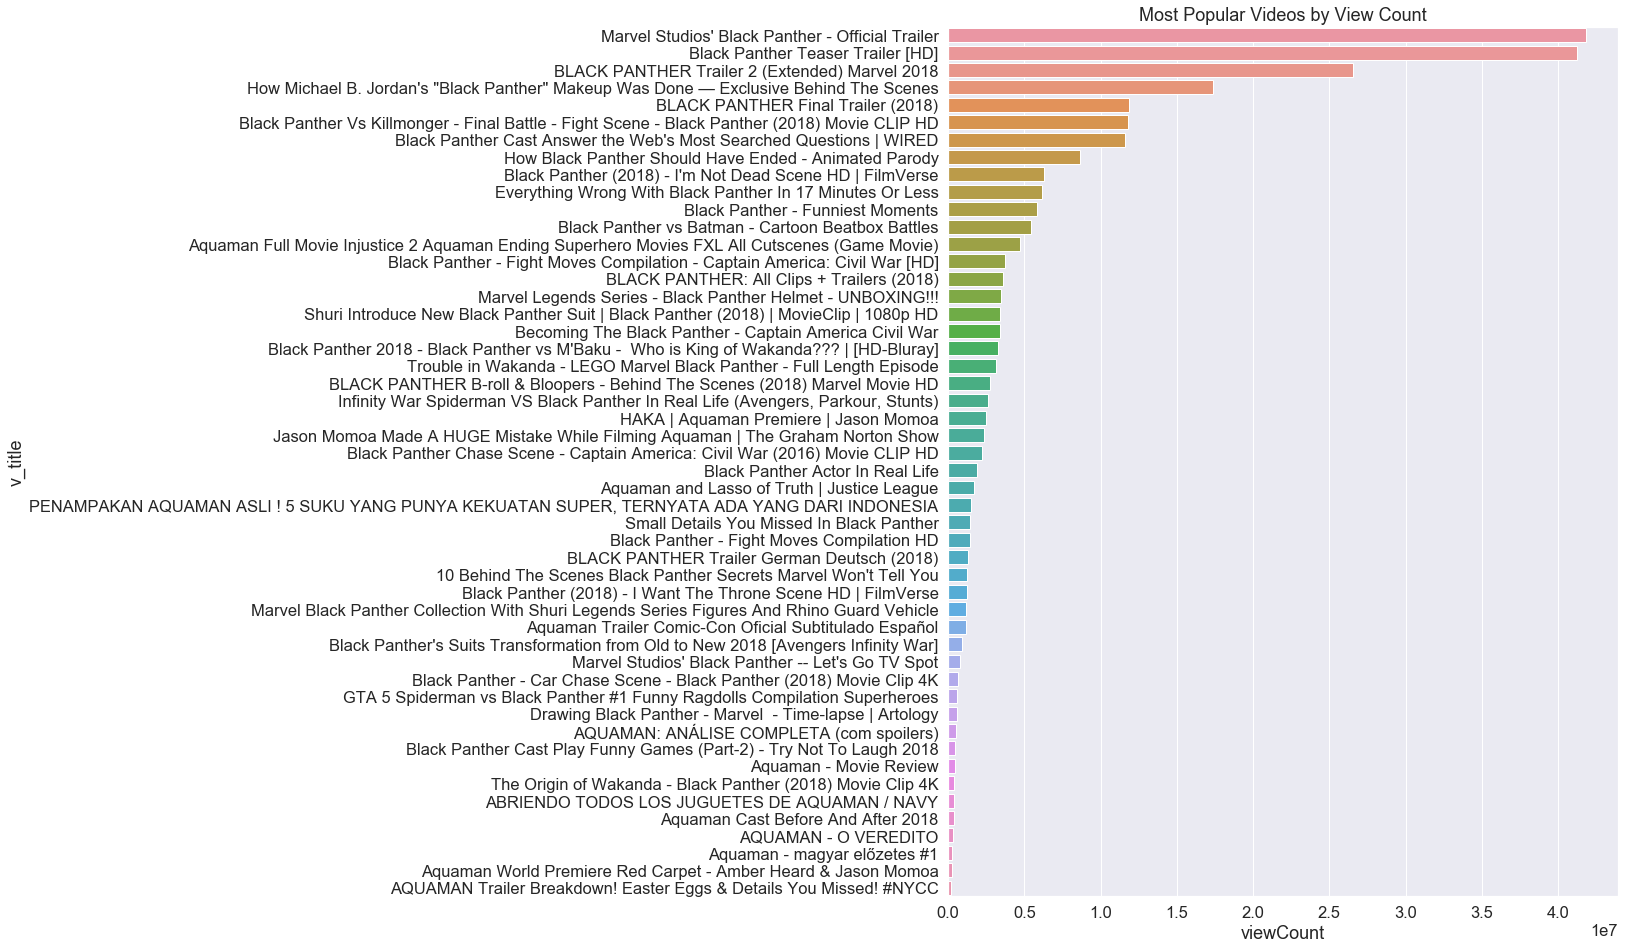

In [36]:
# plot bar chart by view count
plt.figure(figsize=(12,16))
sns.set(font_scale=1.5)
plot = sns.barplot(x=df_final['viewCount'][:50], y=df_final["v_title"][:50], orient="h").set_title("Most Popular Videos by View Count")

**Note: ** From the bar chart above, most of the views are concentrated at the Top 10 videos, with the maximum view count of over 40 million views for the most popular video for the keyword "black panther" which is the official trailer for the Disney/Marvel movie "Black Panther".

### Wrap the code into a Function
To prevent repeating the same code again and again for different queries, we can wrap the code into a function that take in parameters such as query keyword and maximum number of results, and then return the results as a DataFrame that can be saved or analyzed directly.

In [37]:
def youtube_search_stats(query, max_results = 50):
    
    # calling the search.list method to retrieve youtube search results
    search_response = youtube.search().list(q = query,
                                            part = "id,snippet",
                                            maxResults = max_results,
                                            order = "relevance",
                                            type = "video").execute()
    
    # extracting the results from search response
    results = search_response.get("items", [])
    
    # extract the video ids from the results of search response
    video_ids = []

    for search_result in results:
        if search_result["id"]["kind"] == "youtube#video":
            video_ids.append(search_result["id"]["videoId"])
        
    # convert the list of video into a string separated by commas using join function
    video_ids = ",".join(video_ids)
    
    # call the videos.list method to retrieve the statistics for each video
    videos_response = youtube.videos().list(
     id=video_ids,
     part='snippet,statistics'
    ).execute()
    
    # extract the required information as dictionary and then store them into a list of dictionary
    res = []
    for i in videos_response['items']:
        temp_res = dict(v_id = i['id'], v_title = i['snippet']['title'])
        temp_res["publishedAt"] = i["snippet"]["publishedAt"][:10]
        temp_res["channelTitle"] = i["snippet"]["channelTitle"]
        temp_res.update(i['statistics'])
        res.append(temp_res)
        
    # convert the list of dictionary into a pandas DataFrame
    df = pd.DataFrame.from_dict(res)
    
    # convert string into numeric and datetime columns
    # sort table by viewCount and likeCount
    numeric_columns = ["commentCount", "dislikeCount", "favoriteCount", "likeCount", "viewCount"]
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
    df["publishedAt"] = pd.to_datetime(df["publishedAt"])
    dataframe = df.sort_values(by=['viewCount', 'likeCount'], ascending=False).reset_index(drop=True)
    
    return dataframe

### Test the Function
We can test the function by making a query for "wonder woman" with 50 as maximum results, and then create the same visualization to compare the results with "Black Panther" earlier.

In [38]:
test = youtube_search_stats("wonder woman")

In [39]:
# take a look at the top 10 results
test.head(10)

,channelTitle,commentCount,dislikeCount,favoriteCount,likeCount,publishedAt,v_id,v_title,viewCount
0,Flashback FM,9028,12910,0,137547,2018-03-14,uC9qU3X1JgM,Evil Superman vs Justice League | Justice Lea...,27713878
1,Warner Bros. Pictures,26486,8885,0,227238,2016-11-03,1Q8fG0TtVAY,WONDER WOMAN - Official Trailer [HD],26677898
2,CeltSoul,1352,10737,0,19021,2017-01-13,ZvclOE4LV3E,WWE 2K17 Wonder Woman vs. Rogue - Ironman Match,24897961
3,Warner Bros. Pictures,14526,5277,0,105548,2017-05-08,VSB4wGIdDwo,WONDER WOMAN – Rise of the Warrior [Official F...,18125856
4,coughdrop75,318,3880,0,10097,2013-04-04,VY0Mbt3dK8o,Wonder Woman Video #102,12819424
5,EpicMashups,3532,3134,0,47957,2017-05-28,XMb_nKGhSTQ,Gal Gadot | Wonder Woman ★ Hottest Tribute Eve...,9532791
6,EpicMashups,1023,3770,0,22564,2017-05-31,-krwdxCR-VI,Wonder Woman Cast ★ Before And After,8082360
7,Iván Moyano,201,4286,0,11150,2012-09-29,u9W7hVVxfeA,"The new Wonder Woman - Dani - Movie World, War...",7817262
8,Scopian01,3686,2108,0,36471,2017-08-29,Yrdih26Dv_g,Wonder Woman vs Soldiers | Wonder Woman (2017)...,7762282
9,Scopian01,6694,2105,0,49670,2017-08-29,MlwHKphUU_Y,No Man's Land Scene | Wonder Woman (2017) Movi...,7279174


In [40]:
# check that the data format for all the columns is correct
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
channelTitle     50 non-null object
commentCount     50 non-null int64
dislikeCount     50 non-null int64
favoriteCount    50 non-null int64
likeCount        50 non-null int64
publishedAt      50 non-null datetime64[ns]
v_id             50 non-null object
v_title          50 non-null object
viewCount        50 non-null int64
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 3.6+ KB


## Visualization
We will plot a bar chart to visualize the top 50 most popular videos for "wonder woman" sorted by viewCount

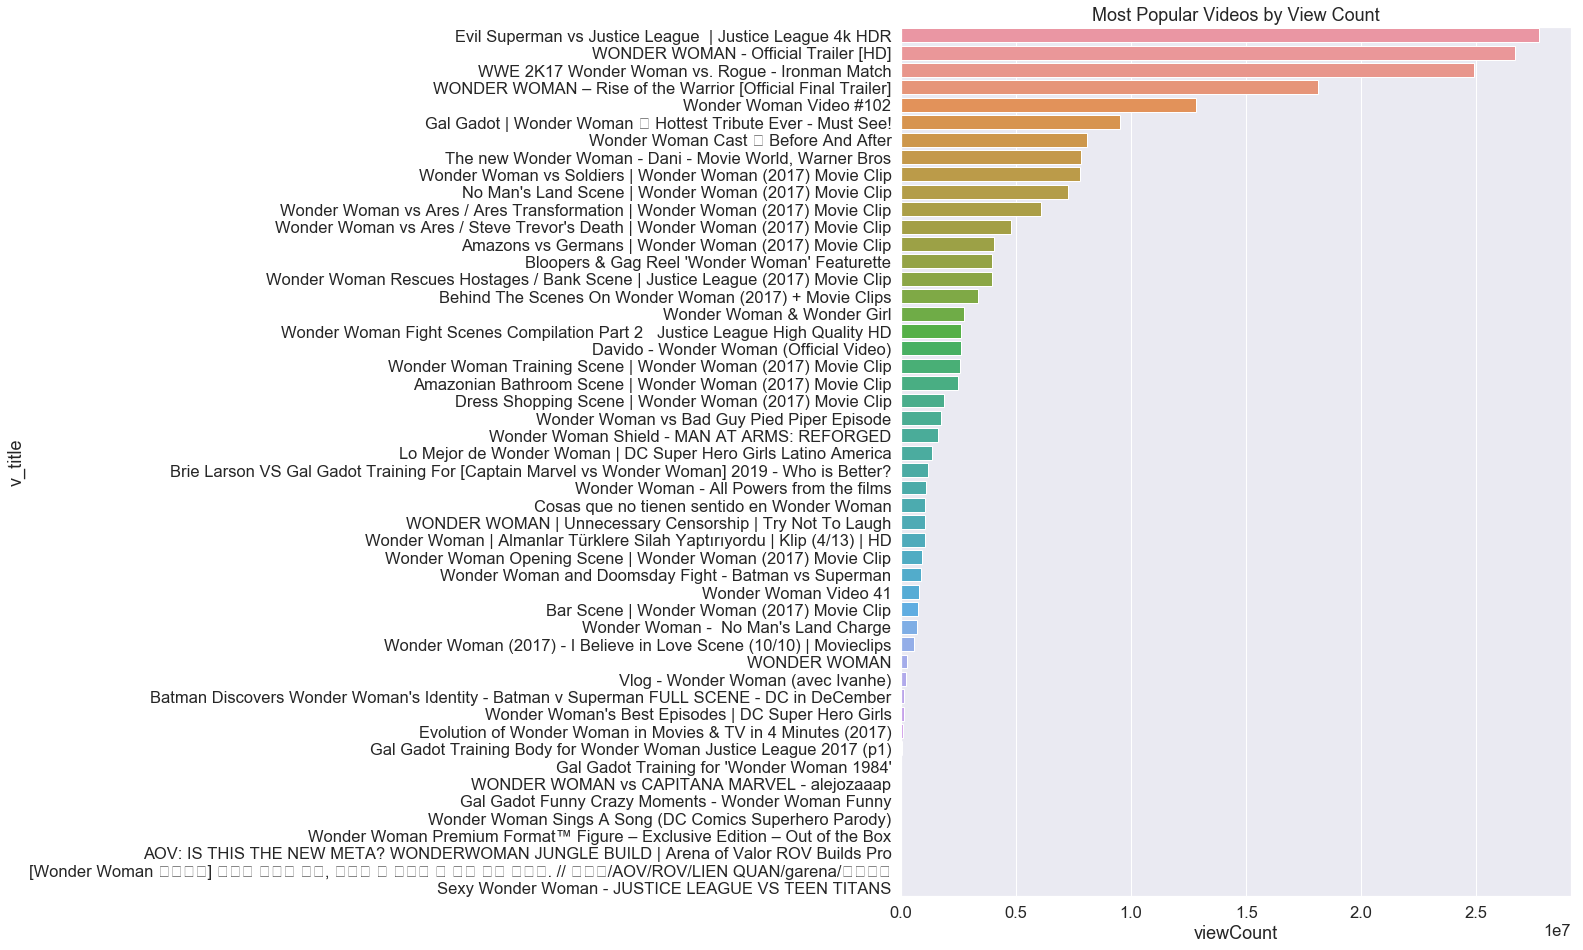

In [41]:
# plot bar chart by view count
plt.figure(figsize=(12,16))
sns.set(font_scale=1.5)
plot = sns.barplot(x=test['viewCount'], y=test["v_title"], orient="h").set_title("Most Popular Videos by View Count")

**Note: ** Surprisingly, the most popular video for the keyword "wonder woman" is not the Official Trailer of the movie, but it is the video clip from the movie "Justice League" which features Wonder Woman as one of the members of the JL fighting against an "evil" Superman who was just resurrected. The Official Trailer for Wonder Woman came at a close second position with over 20 million views.

***
# <a name="channels">By Channels</a>

### Analyzing Particular Channel
There are times when we want to specifically extract data for a particular YouTube Channel that we are interested to analyze. In such cases, we can add in a new parameter called `channelId` and set the channel ID accordingly. You can find out the channel ID from the Channel Page website address, for example https://www.youtube.com/channel/UCD6MMR4yjgC6mzrMF_amkUQ, the channel ID is the last part of the URL i.e. "UCD6MMR4yjgC6mzrMF_amkUQ". To simplify things, we will modify the earlier Function and assign it with a new name. 

In [42]:
def youtube_search_channelid(channelid, max_results = 50):
    
    # calling the search.list method to retrieve youtube search results
    search_response = youtube.search().list(channelId = channelid,
                                            part = "id,snippet",
                                            maxResults = max_results,
                                            order = "relevance",
                                            type = "video").execute()
    
    # extracting the results from search response
    results = search_response.get("items", [])
    
    # extract the video ids from the results of search response
    video_ids = []

    for search_result in results:
        if search_result["id"]["kind"] == "youtube#video":
            video_ids.append(search_result["id"]["videoId"])
        
    # convert the list of video into a string separated by commas using join function
    video_ids = ",".join(video_ids)
    
    # call the videos.list method to retrieve the statistics for each video
    videos_response = youtube.videos().list(
     id=video_ids,
     part='snippet,statistics'
    ).execute()
    
    # extract the required information as dictionary and then store them into a list of dictionary
    res = []
    for i in videos_response['items']:
        temp_res = dict(v_id = i['id'], v_title = i['snippet']['title'])
        temp_res["publishedAt"] = i["snippet"]["publishedAt"][:10]
        temp_res["channelTitle"] = i["snippet"]["channelTitle"]
        temp_res.update(i['statistics'])
        res.append(temp_res)
        
    # convert the list of dictionary into a pandas DataFrame
    df = pd.DataFrame.from_dict(res)
    
    # convert string into numeric and datetime columns
    # sort table by viewCount and likeCount
    numeric_columns = ["commentCount", "dislikeCount", "favoriteCount", "likeCount", "viewCount"]
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
    df["publishedAt"] = pd.to_datetime(df["publishedAt"])
    dataframe = df.sort_values(by=['viewCount', 'likeCount'], ascending=False).reset_index(drop=True)
    
    return dataframe

### Test the Function
We can test the function by making a query for the channel "LEAD" at https://www.youtube.com/channel/UCD6MMR4yjgC6mzrMF_amkUQ, the channel ID is the last part of the URL i.e. "UCD6MMR4yjgC6mzrMF_amkUQ".

In [43]:
test_lead = youtube_search_channelid("UCD6MMR4yjgC6mzrMF_amkUQ", max_results = 50)

In [44]:
# take a look at the top 10 videos from the result
test_lead.head(10)

,channelTitle,commentCount,dislikeCount,favoriteCount,likeCount,publishedAt,v_id,v_title,viewCount
0,LEAD,1,0,0,20,2018-07-25,Na-bqLhw0cY,Data Crunch: How To Break Into Data Science,588
1,LEAD,0,0,0,3,2016-06-28,kfCAM6yImcg,The LEAD Show Ep3 - Full Stack Development,315
2,LEAD,0,0,0,2,2018-03-10,w_Fu_AcXg_o,Vehicle & Motion Detection with Python,258
3,LEAD,2,0,0,7,2018-08-02,QeR7uqybF4Y,Data Crunch: What Is Data Storytelling in Data...,166
4,LEAD,0,0,0,1,2018-07-08,3cngj_y64l8,Dara Tumenbayeva - Data Science 360 Testimonia...,147
5,LEAD,4,0,0,7,2018-08-13,_v09CxfGu6A,Data Crunch: The Biggest Misconceptions in Dat...,142
6,LEAD,1,0,0,3,2018-08-28,3kShqFPVga8,Data Crunch - Data Science for Digital Marketing,130
7,LEAD,0,0,0,0,2018-11-11,kHdR_UcgxeY,The Knowledge Vault Sale by LEAD - Up to 73% S...,113
8,LEAD,0,0,0,1,2018-07-08,oonxZQ1zuDI,Shafiq Iqbal - Data Science 360 Review - LEAD,110
9,LEAD,1,0,0,7,2018-10-03,726zIGShyPg,How To Analyze Your Customer Reviews with Text...,103


In [45]:
# check that the data format for all the columns is correct
test_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
channelTitle     43 non-null object
commentCount     43 non-null int64
dislikeCount     43 non-null int64
favoriteCount    43 non-null int64
likeCount        43 non-null int64
publishedAt      43 non-null datetime64[ns]
v_id             43 non-null object
v_title          43 non-null object
viewCount        43 non-null int64
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 3.1+ KB


## Visualization
From the results above, the YouTube channel "LEAD" only has 43 videos, we will plot a bar chart to visualize all the 43 videos for this channel.

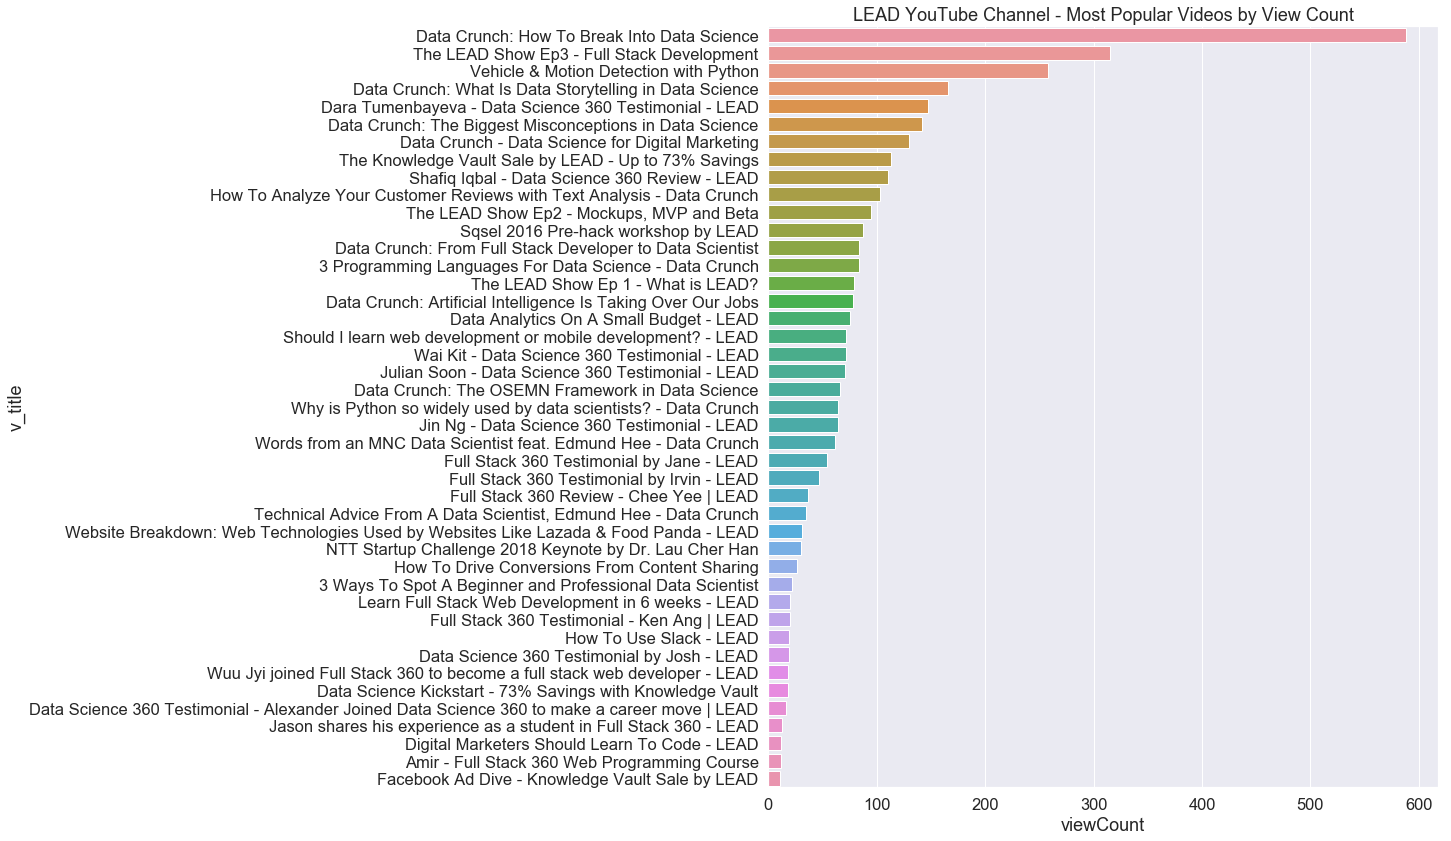

In [46]:
# plot bar chart by view count
plt.figure(figsize=(12,14))
sns.set(font_scale=1.5)
plot = sns.barplot(x=test_lead['viewCount'], y=test_lead["v_title"], orient="h").set_title("LEAD YouTube Channel - Most Popular Videos by View Count")

In [47]:
# save the figure
fig = plot.get_figure()
fig.savefig("viewCount.png", bbox_inches="tight")

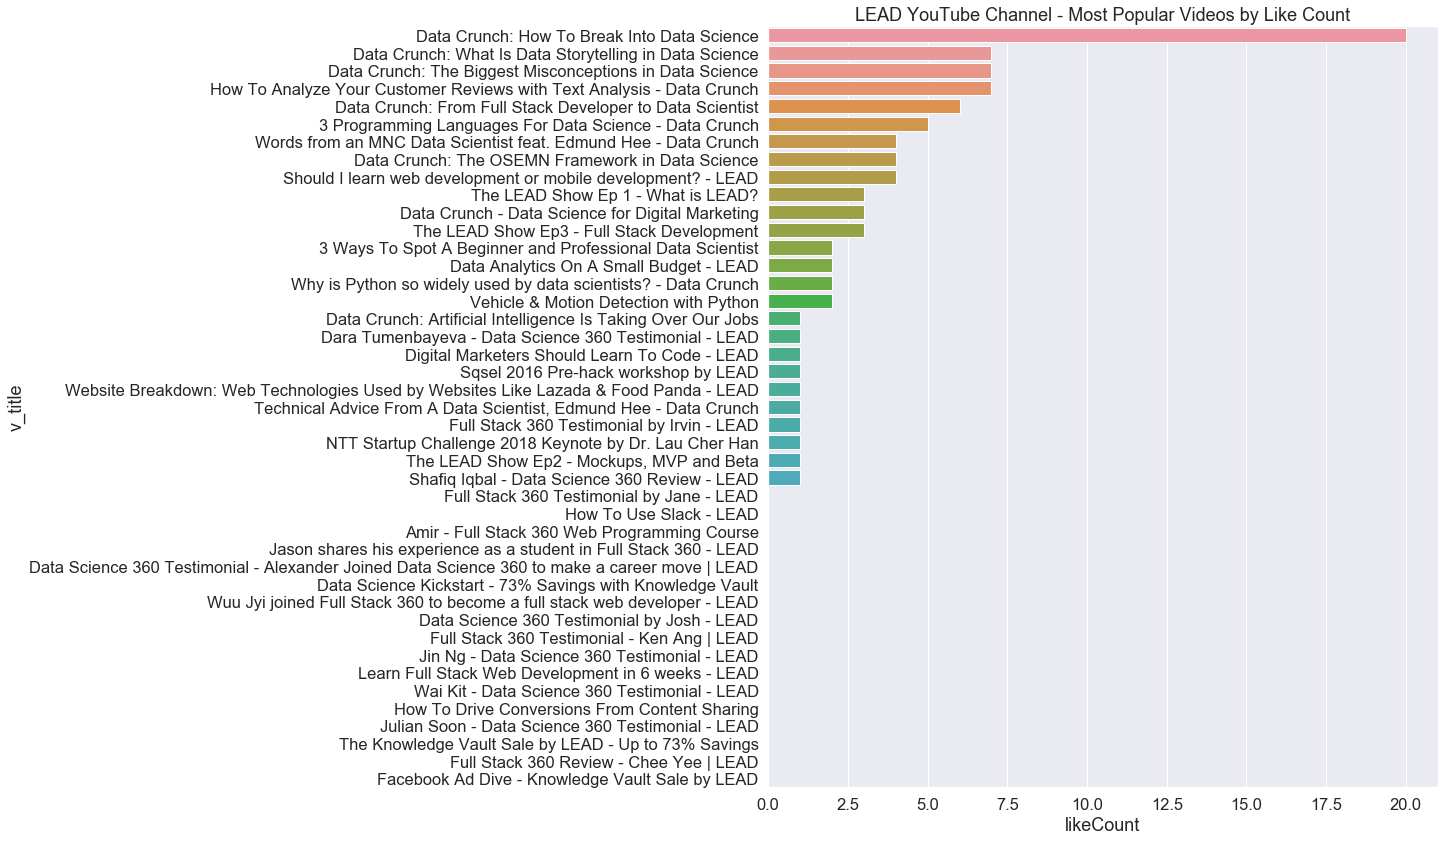

In [48]:
# plot bar chart by like count
plt.figure(figsize=(12,14))
sns.set(font_scale=1.5)
plot = sns.barplot(x=test_lead.sort_values(by=['likeCount'], ascending=False)["likeCount"], y=test_lead.sort_values(by=['likeCount'], ascending=False)["v_title"], orient="h").set_title("LEAD YouTube Channel - Most Popular Videos by Like Count")

In [49]:
# save the figure
fig = plot.get_figure()
fig.savefig("likeCount.png", bbox_inches="tight")

**Note: ** From the charts, it seems that the view count and like count are concentrated on one video, titled "Data Crunch: How To Break Into Data Science" with over 500 views and 20 likes.

## Futher Analysis
We can also analyze the data further by breaking down the view count by the day of the week. To do so, we need to extract the day of the week from the "publishedAt" column. Since the column is already in datetime format, we can use the `dt.dayofweek` property to extract the day. By default, this property returns the day of the week with Monday=0, Sunday=6. To make it more intuitive, we will add 1 to the result, which will become Monday=1, Sunday=7.

In [50]:
# create a new column and extract the day of the week + 1
test_lead["weekday"] = test_lead["publishedAt"].dt.dayofweek + 1
test_lead

,channelTitle,commentCount,dislikeCount,favoriteCount,likeCount,publishedAt,v_id,v_title,viewCount,weekday
0,LEAD,1,0,0,20,2018-07-25,Na-bqLhw0cY,Data Crunch: How To Break Into Data Science,588,3
1,LEAD,0,0,0,3,2016-06-28,kfCAM6yImcg,The LEAD Show Ep3 - Full Stack Development,315,2
2,LEAD,0,0,0,2,2018-03-10,w_Fu_AcXg_o,Vehicle & Motion Detection with Python,258,6
3,LEAD,2,0,0,7,2018-08-02,QeR7uqybF4Y,Data Crunch: What Is Data Storytelling in Data...,166,4
4,LEAD,0,0,0,1,2018-07-08,3cngj_y64l8,Dara Tumenbayeva - Data Science 360 Testimonia...,147,7
5,LEAD,4,0,0,7,2018-08-13,_v09CxfGu6A,Data Crunch: The Biggest Misconceptions in Dat...,142,1
6,LEAD,1,0,0,3,2018-08-28,3kShqFPVga8,Data Crunch - Data Science for Digital Marketing,130,2
7,LEAD,0,0,0,0,2018-11-11,kHdR_UcgxeY,The Knowledge Vault Sale by LEAD - Up to 73% S...,113,7
8,LEAD,0,0,0,1,2018-07-08,oonxZQ1zuDI,Shafiq Iqbal - Data Science 360 Review - LEAD,110,7
9,LEAD,1,0,0,7,2018-10-03,726zIGShyPg,How To Analyze Your Customer Reviews with Text...,103,3


In [51]:
# group the "weekday" column by view count 
test_lead.groupby("weekday").agg({"viewCount": [lambda x: x.count(), np.sum, np.mean]}).rename(columns={'<lambda>': 'Count',
                     'sum': 'Sum',
                     'mean': 'Average'})

viewCount                 
            Count  Sum     Average
weekday                           
1              10  443   44.300000
2               8  738   92.250000
3               6  920  153.333333
4               5  261   52.200000
5               3  161   53.666667
6               4  399   99.750000
7               7  664   94.857143

**Note: ** It seems like Wednesday has the highest average and total view count.

Text(0.5,1,'LEAD YouTube Channel - View Count by Day of the Week')

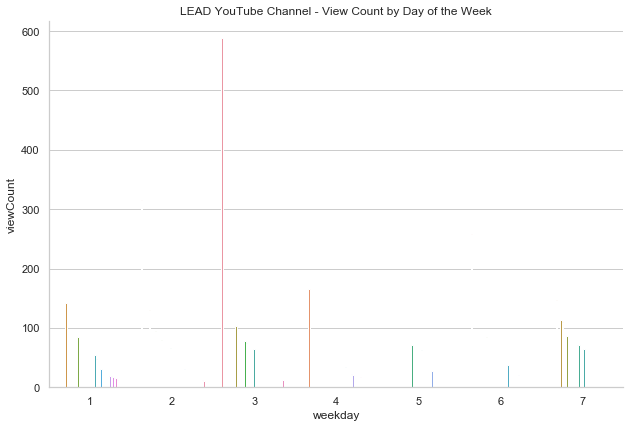

In [52]:
# plot a bar chart to see the distribution of view count by videos
sns.set(style="whitegrid")
plot = sns.catplot(x="weekday", y="viewCount", hue="v_title", height=6, aspect=1.5, data=test_lead, kind="bar", legend=False)
plt.title("LEAD YouTube Channel - View Count by Day of the Week")

In [53]:
# save the figure
fig = plot.fig
fig.savefig("weekday.png", bbox_inches="tight")

**Note: ** It seems that the reason Wednesday has the highest average and total view count is due to an extreme value i.e. the video with the highest view count was published on Wednesday with over 500 views. But this does not mean that videos published on Wednesday will always have high view count, in this case it is just because of the effect of one extreme value. A closer look at the viewCount by weekday table above, the other days with the highest average view count are Tuesday, Saturday and Sunday. So perhaps, it is a wise move to publish videos during weekends in order to get more views.

***
# <a name="comments">Extracting Video Comments</a>

YouTube Data API can also return the comments of a video. There are times when we want to extract the comments for a particular video to analyze futher, for example to do sentiment analysis on the comments to gauge the users' reaction to the video. To do this, we can use YouTube's CommentThreads. A commentThread resource contains information about a YouTube comment thread, which comprises a top-level comment and replies, if any exist, to that comment. Again, to make things simpler, we will create a new function by modifying the earlier function. The maximum number of items that will be returned in the result per call is 100. More info at https://developers.google.com/youtube/v3/docs/commentThreads

In [73]:
def youtube_video_comments(video_id, max_results = 100):
    
    # calling the search.list method to retrieve youtube search results
    search_response = youtube.commentThreads().list(videoId = video_id, 
                                                part = part,
                                                maxResults = max_results,
                                                order = "time",
                                                textFormat = "plainText",).execute()

    comments = []

    # Extracting required info from each result
    for result in search_response['items']:
        comment = {}
        comment['id'] = result['id']
        comment['text'] = result['snippet']['topLevelComment']['snippet']['textDisplay']
        comment['likes'] = result['snippet']['topLevelComment']['snippet']['likeCount']
        comments.append(comment)
    
    return comments

### Test the Function
To test the function, we need to enter the video_id as parameter. In this example, we will extract the comments from the official movie trailer of "Aquaman" at https://www.youtube.com/watch?v=WDkg3h8PCVUcan which has the video_id of "WDkg3h8PCVUtest". We will perform wordcloud visualization on the most popular words in the comments. And then we will perform sentiment analysis on the comments using NLTK in order to gauge the viewers' response to the movie, this may give us some indication whether the movie will be a blockbuster success or a flop.

In [74]:
# call the function to extract the comments
comments = youtube_video_comments("WDkg3h8PCVU", max_results = 100)

In [75]:
# take a look at the results
print("No of comments: {}".format(len(comments)))
comments

No of comments: 100


[{'id': 'UgycXf3xKG-rPYjTKSZ4AaABAg',
  'likes': 0,
  'text': 'This movie was awesome 10/10'},
 {'id': 'UgzetY4bB30-o50YqBp4AaABAg',
  'likes': 1,
  'text': "I'm a Marvel fan but I had to see this it was super good! My fav movie"},
 {'id': 'Ugws5M-I0Y7JYay4z6l4AaABAg',
  'likes': 1,
  'text': 'Just saw this movie and it has been one of the best dc movies in a while would watch it again \r\n(From a marvel fan)'},
 {'id': 'Ugw1u6sibxIfI6UzNeR4AaABAg',
  'likes': 0,
  'text': 'I just watched this and it blew me away!  Awesome!  👍🏻👍🏻👍🏻'},
 {'id': 'Ugw-mXy3TO6HQ-djuIV4AaABAg',
  'likes': 0,
  'text': 'Huge Respect for this movie , and it really needs alot of attention it deserves 😍 it just saved DCEU just like Wonder Woman'},
 {'id': 'UgwurYf52b0HdT_BbDp4AaABAg',
  'likes': 0,
  'text': "This movie is totally awsome!!! I thought it's going to be disappointing. This is it, a milestone for DC.\n\nWay better than the Black Panther movie hahaha."},
 {'id': 'UgylrUniPQ9q-ybWowJ4AaABAg',
  'likes

In [76]:
# extract the comments into a list
all_text = []

for text in comments:
    all_text.append(text["text"])
        
print(len(all_text))
all_text

100


['This movie was awesome 10/10',
 "I'm a Marvel fan but I had to see this it was super good! My fav movie",
 'Just saw this movie and it has been one of the best dc movies in a while would watch it again \r\n(From a marvel fan)',
 'I just watched this and it blew me away!  Awesome!  👍🏻👍🏻👍🏻',
 'Huge Respect for this movie , and it really needs alot of attention it deserves 😍 it just saved DCEU just like Wonder Woman',
 "This movie is totally awsome!!! I thought it's going to be disappointing. This is it, a milestone for DC.\n\nWay better than the Black Panther movie hahaha.",
 'Awesome movie\U0001f929\nFall in love in DC😁',
 'this movie is insane honestly 9/10',
 "They should make Aquaman 2 Manta's revenge",
 'Awesome movie, please watch it only in IMAX. 😎\U0001f9dc\u200d♂️',
 'If you combine the good parts of Avatar, the first 30 minutes of Man of Steel, and Thor Ragnarok you get Aquaman.',
 "And you never see, someone pee or loose a turd in Aquaman's kingdom. \nImagine him trying to c

In [77]:
# join all comments into a string
text = " ".join(all_text)
text[:1000]

"This movie was awesome 10/10 I'm a Marvel fan but I had to see this it was super good! My fav movie Just saw this movie and it has been one of the best dc movies in a while would watch it again \r\n(From a marvel fan) I just watched this and it blew me away!  Awesome!  👍🏻👍🏻👍🏻 Huge Respect for this movie , and it really needs alot of attention it deserves 😍 it just saved DCEU just like Wonder Woman This movie is totally awsome!!! I thought it's going to be disappointing. This is it, a milestone for DC.\n\nWay better than the Black Panther movie hahaha. Awesome movie\U0001f929\nFall in love in DC😁 this movie is insane honestly 9/10 They should make Aquaman 2 Manta's revenge Awesome movie, please watch it only in IMAX. 😎\U0001f9dc\u200d♂️ If you combine the good parts of Avatar, the first 30 minutes of Man of Steel, and Thor Ragnarok you get Aquaman. And you never see, someone pee or loose a turd in Aquaman's kingdom. \nImagine him trying to communicate and fight evil, while some nasty b

In [78]:
# import libraries for regex, wordcloud and counter
import re
from wordcloud import WordCloud
from collections import Counter

In [79]:
# perform tokenization
# the w+ allows us to capture the word as a whole, and giving us a much cleaner result compared to only using split()
# the r beside  \w+ here represents a raw string, it is a special requirements for regex

tokens = re.findall(r'\w+', text)
print("Number of tokens = "+"{:,}\n".format(len(tokens)))
print(tokens[:50])

Number of tokens = 2,191

['This', 'movie', 'was', 'awesome', '10', '10', 'I', 'm', 'a', 'Marvel', 'fan', 'but', 'I', 'had', 'to', 'see', 'this', 'it', 'was', 'super', 'good', 'My', 'fav', 'movie', 'Just', 'saw', 'this', 'movie', 'and', 'it', 'has', 'been', 'one', 'of', 'the', 'best', 'dc', 'movies', 'in', 'a', 'while', 'would', 'watch', 'it', 'again', 'From', 'a', 'marvel', 'fan', 'I']


In [80]:
# remove stop words and rank the top 50 high occurrence keywords

stopwords = open('stopwords.txt','r').read().splitlines()
tokens = [t.lower() for t in tokens if t.lower() not in stopwords]

print(Counter(tokens).most_common(50))

[('movie', 56), ('dc', 25), ('aquaman', 19), ('awesome', 11), ('watch', 10), ('watched', 10), ('film', 9), ('watching', 8), ('marvel', 7), ('movies', 7), ('amazing', 7), ('black', 6), ('https', 6), ('battle', 6), ('toads', 6), ('10', 5), ('love', 5), ('superhero', 5), ('god', 5), ('fan', 4), ('panther', 4), ('2', 4), ('cgi', 4), ('james', 4), ('wan', 4), ('ocean', 4), ('story', 4), ('frogs', 4), ('super', 3), ('dceu', 3), ('woman', 3), ('manta', 3), ('minutes', 3), ('5', 3), ('lot', 3), ('khal', 3), ('drogo', 3), ('english', 3), ('comic', 3), ('dont', 3), ('trailer', 3), ('ve', 3), ('4d', 3), ('underwater', 3), ('comics', 3), ('superman', 3), ('loved', 3), ('batman', 3), ('3', 3), ('toad', 3)]


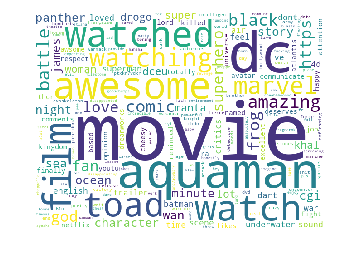

In [83]:
# create word cloud visualization

text_wordcloud = " ".join(tokens)
cloud = WordCloud(background_color="white", width=640, height=480, collocations = False).generate(text_wordcloud)

plt.imshow(cloud)
plt.axis("off")
plt.show()

In [84]:
# save the word cloud
cloud.to_file("wordcloud.png")

***
### Sentiment Analysis using NLTK
We will perform sentiment analysis using NLTK’s VADER (a Python module) to classify comments as positive, negative or neutral. NLTK comes with an inbuilt sentiment analyser module – nltk.sentiment.vader—that can analyse a piece of text and classify the sentences under positive, negative and neutral polarity of sentiments. The "compound" value conveys the overall positive or negative user experience.

In [85]:
# import libraries
import nltk

# download the lexicon
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\limchiahooi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [86]:
# import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [87]:
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# stopwords = stopwords.words('english')
# stopwords

In [88]:
# classify the comments
summary = {"positive":0,"neutral":0,"negative":0}

for x in all_text: 
    ss = sid.polarity_scores(x)
    if ss["compound"] == 0.0: 
        summary["neutral"] +=1
    elif ss["compound"] > 0.0:
        summary["positive"] +=1
    else:
        summary["negative"] +=1

summary

{'negative': 15, 'neutral': 31, 'positive': 54}

In [89]:
# take a look at the different sentiment proportions for individual comments
for sentence in all_text:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print("\n")

This movie was awesome 10/10
compound: 0.6249, neg: 0.0, neu: 0.494, pos: 0.506, 

I'm a Marvel fan but I had to see this it was super good! My fav movie
compound: 0.952, neg: 0.0, neu: 0.37, pos: 0.63, 

Just saw this movie and it has been one of the best dc movies in a while would watch it again 
(From a marvel fan)
compound: 0.7906, neg: 0.0, neu: 0.75, pos: 0.25, 

I just watched this and it blew me away!  Awesome!  👍🏻👍🏻👍🏻
compound: 0.6892, neg: 0.0, neu: 0.658, pos: 0.342, 

Huge Respect for this movie , and it really needs alot of attention it deserves 😍 it just saved DCEU just like Wonder Woman
compound: 0.8658, neg: 0.0, neu: 0.627, pos: 0.373, 

This movie is totally awsome!!! I thought it's going to be disappointing. This is it, a milestone for DC.

Way better than the Black Panther movie hahaha.
compound: 0.6341, neg: 0.098, neu: 0.675, pos: 0.226, 

Awesome movie🤩
Fall in love in DC😁
compound: 0.8519, neg: 0.0, neu: 0.376, pos: 0.624, 

this movie is insane honestly 9/10
co

***
### Findings
Out of the 100 comments, 54 are classified as positive, 31 as neutral and 15 as negative. This indicates that the viewers' responses are mixed, although one could argue that the sentiment is positive as there are more positive comments than negative ones. Given the small sample size of 100, whether this positive sentiment could translate into good box office result is anyone's guess. But it does indicate to the movie studio that they need to beef up its marketing effort to promote the movie.

***
# Ending Note
In this project, I have used YouTube Data API to extract the info, statistics and comment about YouTube videos. I have wrapped the code into different functions that can be reused to extract the statistics and comments and return the results as pandas DataFrame. I have performed some visualization on the results by creating bar charts on the most popular videos by view count and by day of the week. For the comments of the video, wordcloud visualization has been created to visualize the most popular keywords in the comments. Lastly, sentiment analysis was performed on the comments and the results showed majority of the viewers' responses are positive.

There is still some room for improvement for this project, such as extracting a larger sample of comments for the sentiment analysis. Nevertheless, this project should serve as a good reference for those interested to work with YouTube Data API to extract data about YouTube videos for further analysis. I hope you enjoyed reading my project. If you have any feedback for this project, feel free to contact me via my [LinkedIn](https://www.linkedin.com/in/limchiahooi) or [GitHub Pages](https://limchiahooi.github.io).

***
### References

* YouTube Data API: https://developers.google.com/youtube/v3/

* YouTube Data in Python: https://medium.com/greyatom/youtube-data-in-python-6147160c5833

* Natural Language Toolkit: https://www.nltk.org/

* Analysing Sentiments with NLTK: https://opensourceforu.com/2016/12/analysing-sentiments-nltk/

* Sentiment analysis with NLTK /VADER — Comments on Lee Hsien Loong’s Facebook post: https://medium.com/@sharonwoo/sentiment-analysis-with-nltk-422e0f794b8